In [1]:
import numpy as np
import pandas as pd
from math import log
import matplotlib.pyplot as plt

In [2]:
#Reading the dataset

data=pd.read_csv("data.txt",header=None)
class0=data[data.iloc[:,-1]==0]
class1=data[data.iloc[:,-1]==1]
data=np.asarray(data)
np.random.shuffle(data)

In [3]:
#Normalizing the Data(Feature Scaling)

for i in range(np.shape(data)[1]-1):
     column = data[:, i]
     # data[:, i] = (column - column.min()) / (column.max() - column.min())   #min-max normalisation
     data[:, i] = (column - np.mean(column)) / np.std(column)  #Z-score Normalisation


In [4]:
#Model Parameters

epochs=2500
loss_train = []
ALPHA=1
w = np.zeros(5,dtype=float)   #Initialising the weights

In [5]:
#Test-Train Split

x=data[:,0:4]
y=data[:,4]
X_train, X_test=x[:int(0.8*len(x))],x[int(0.8*len(x)):]
y_train, y_test=y[:int(0.8*len(x))],y[int(0.8*len(x)):]
X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)


In [6]:
#Sigmoid Function

def sigmoid(x):
    func=1/(1+np.exp(-x))
    return func

#Loss Function for Logistic Regression

def error(h,y):
    error=-(y*log(h)+((1-y)*log(1-h)))
    return error

In [7]:
#Logistic Regression Model

def model(x,y):
    loss=0
    delta = np.zeros(5, dtype=float)
    for i in range(len(y)):
        h = np.dot(w,x[i])
        h = sigmoid(h)
        loss += 1/len(y)*error(h,y[i])
        for j in range(len(delta)):
            delta[j] += 1 /len(y)*(h - y[i])*x[i][j]

    return loss, delta


In [8]:
#Logistic Regression with L1 Regularization

def L1_reg(x,y,lambdA=0.2):

    loss=0
    delta = np.zeros(5, dtype=float)
    for i in range(len(y)):
        h = np.dot(w, x[i])
        h = sigmoid(h)
        loss += 1 / len(y) * error(h, y[i])
        for j in range(len(delta)):
            delta[j] += 1 / len(y) * (h - y[i]) *x[i][j]
    loss += (1 / len(y)) * (lambdA * np.sum(abs(w)))

    for j in range(len(delta)):
        delta[j] += 1 / len(y)*(lambdA*np.sign(w[j]))

    return loss,delta

In [9]:
#Logistic Regression with L2 Regularization

def L2_reg(x,y,lambdA=0.2):

    loss = 0
    delta = np.zeros(5, dtype=float)

    for i in range(len(y)):
        h = np.dot(w, x[i])
        h = sigmoid(h)
        loss += 1 / len(y) * error(h, y[i])
        for j in range(len(delta)):
            delta[j] += 1 / len(y) * (h - y[i]) *x[i][j]

    loss += 1 / len(y) * ((lambdA / 2) * np.sum(w ** 2))

    for j in range(len(delta)):
        delta[j] += 1 / len(y)*(lambdA*w[j])


    return loss,delta

In [11]:
#Running the Model for given No. of epochs

for i in range(epochs):
    #print(i)

    #Change the Model Type here:

    # loss,delta=model(X_train,y_train)
    # loss, delta = L1_reg(X_train, y_train,lambdA=0.01)
    loss, delta = L2_reg(X_train, y_train,lambdA=0.01)

    #Weight Update Rule

    for k in range(len(w)):
        w[k] = w[k] - ALPHA * delta[k]
    loss_train.append(loss)


In [12]:
#Testing the Model on the validation set

TN, FN, TP, FP = 0,0,0,0

for i in range(len(X_test)):
    y_ = np.dot(w,X_test[i])
    y_ = sigmoid(y_)

    #Decision  Rule
    if(y_>=0.5):
        y_ = 1
    else:
        y_ = 0


    if(y_==1 and y_test[i]==1): TP += 1
    if(y_==0 and y_test[i]==0): TN += 1
    if(y_==1 and y_test[i]==0): FP += 1
    if(y_==0 and y_test[i]==1): FN += 1

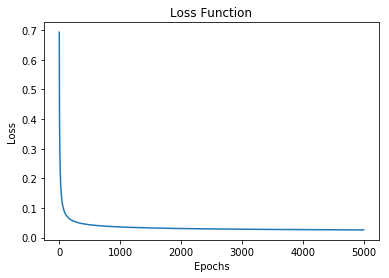

F-score: 0.9830508474576272
Accuracy: 0.9854545454545455
Weights [ -4.05753366  -9.06128276 -10.0048515   -9.02237587  -0.03204264]


In [13]:
#Calculating F-score and the Accuracy

P=TP/(TP+FP)
R=TP/(TP+FN)
F=(2*P*R)/(P+R)
accuracy = (TP+TN)/(TP + TN + FP + FN)

#Plotting the loss function vs Epochs

plt.plot(loss_train)
plt.title("Loss Function")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("Loss Function of Logistic Regression")
plt.show()


print("F-score:",F)
print("Accuracy:",accuracy)
print("Weights",w)
